<a href="https://colab.research.google.com/github/ucfilho/Higor/blob/main/ANN/Higor_MN_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
!gdown 1oOmdfbuG6uI5H5A_72OBfvTCumONGhYo
df = pd.read_excel('Analises_absorção_V1.xlsx','Planilha4')
df = df[['TMB','EDTA','H2SO4','D2EHPA','MN']]
X = np.array(df.drop(['MN'],axis=1))
y = df['MN'].values.reshape(-1,1).copy()

Downloading...
From: https://drive.google.com/uc?id=1oOmdfbuG6uI5H5A_72OBfvTCumONGhYo
To: /content/Analises_absorção_V1.xlsx
100% 29.3k/29.3k [00:00<00:00, 33.7MB/s]


In [3]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30,2,0.50,0.08,7.700000
1,30,2,0.50,0.16,10.280833
2,30,2,0.80,0.08,10.245833
3,30,2,0.80,0.16,29.762500
4,30,4,0.50,0.08,11.625000
5,30,4,0.50,0.16,9.819167
6,30,4,0.80,0.08,12.056667
7,30,4,0.80,0.16,10.269167
8,50,2,0.50,0.08,8.374167
9,50,2,0.50,0.16,10.686667


In [4]:
# funcao normatiza dados
def Normatiza(x):
    n = x.shape[1]
    for i in range(n):
        max_x=x[:,i].max()
        min_x=x[:,i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[:,i]=(x[:,i]-a)/b
    return x

# funcao retorna os dados a forma original
def OriginalX(x_new,x_old):
    n = x_old.shape[1]
    for i in range(n):
        max_x=x_old[:,i].max()
        min_x=x_old[:,i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x_new[:,i]=x_new[:,i]*b+a
    return x_new
def Originaly(y_old,y):
    y_old = y_old.flatten()
    max_y=y_old.max()
    min_y=y_old.min()
    a=(max_y+min_y)/2
    b=(max_y-min_y)/2
    k = 0
    resp = []
    for yi in y:
        resp.append(yi*b+a)
    return np.array(resp)

In [5]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30,2,0.50,0.08,7.700000
1,30,2,0.50,0.16,10.280833
2,30,2,0.80,0.08,10.245833
3,30,2,0.80,0.16,29.762500
4,30,4,0.50,0.08,11.625000
5,30,4,0.50,0.16,9.819167
6,30,4,0.80,0.08,12.056667
7,30,4,0.80,0.16,10.269167
8,50,2,0.50,0.08,8.374167
9,50,2,0.50,0.16,10.686667


In [6]:
'''
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)
X_train = scaler_X.transform(X)
scaler = StandardScaler()
# transform data
scaler_X = scaler.fit(X_train)
#X_train = scaler_X.transform(X_train)
#X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y)
#y_test = scaler_Y.transform(y_test)
'''

'\nscaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)\nscaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)\nX_train = scaler_X.transform(X)\nscaler = StandardScaler()\n# transform data\nscaler_X = scaler.fit(X_train)\n#X_train = scaler_X.transform(X_train)\n#X_test = scaler_X.transform(X_test)\ny_train = scaler_Y.transform(y)\n#y_test = scaler_Y.transform(y_test)\n'

In [7]:

y_train = np.array(df['MN'])
X_train = np.array(df.drop(['MN'],axis=1))
n = X_train.shape[0]
X_train = Normatiza(X_train).copy()
y_train = np.array(Normatiza(y_train.reshape(n,1)))

In [8]:
y_train

array([[-0.77720346],
       [-0.56930926],
       [-0.57212862],
       [ 1.        ],
       [-0.46103242],
       [-0.60649795],
       [-0.42626032],
       [-0.57024904],
       [-0.72289723],
       [-0.53661811],
       [-0.60810902],
       [-0.73531584],
       [-0.51043834],
       [-0.49130697],
       [-0.75263476],
       [-0.51903068],
       [-0.54870108],
       [-0.5774317 ],
       [-0.32577029],
       [-0.63999463],
       [-0.19943613],
       [-0.52668322],
       [-1.        ],
       [-0.54837887],
       [-0.73383903],
       [-0.63046251],
       [-0.57239713]])

In [9]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30,2,0.50,0.08,7.700000
1,30,2,0.50,0.16,10.280833
2,30,2,0.80,0.08,10.245833
3,30,2,0.80,0.16,29.762500
4,30,4,0.50,0.08,11.625000
5,30,4,0.50,0.16,9.819167
6,30,4,0.80,0.08,12.056667
7,30,4,0.80,0.16,10.269167
8,50,2,0.50,0.08,8.374167
9,50,2,0.50,0.16,10.686667


In [10]:
y = df['MN'].values
y

array([ 7.7       , 10.28083333, 10.24583333, 29.7625    , 11.625     ,
        9.81916667, 12.05666667, 10.26916667,  8.37416667, 10.68666667,
        9.79916667,  8.22      , 11.01166667, 11.24916667,  8.005     ,
       10.905     , 10.53666667, 10.18      , 13.30416667,  9.40333333,
       14.8725    , 10.81      ,  4.93416667, 10.54066667,  8.23833333,
        9.52166667, 10.2425    ])

In [11]:
y_train

array([[-0.77720346],
       [-0.56930926],
       [-0.57212862],
       [ 1.        ],
       [-0.46103242],
       [-0.60649795],
       [-0.42626032],
       [-0.57024904],
       [-0.72289723],
       [-0.53661811],
       [-0.60810902],
       [-0.73531584],
       [-0.51043834],
       [-0.49130697],
       [-0.75263476],
       [-0.51903068],
       [-0.54870108],
       [-0.5774317 ],
       [-0.32577029],
       [-0.63999463],
       [-0.19943613],
       [-0.52668322],
       [-1.        ],
       [-0.54837887],
       [-0.73383903],
       [-0.63046251],
       [-0.57239713]])

In [12]:
N_Hidden=5
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                     hidden_layer_sizes=(N_Hidden), max_iter=1500,
                     random_state=11 )


In [13]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=5,
             max_iter=1500, random_state=11, solver='lbfgs')

In [14]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
#y_calc_test=model.predict(X_test)

In [15]:
'''
# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
#y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
#y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
'''

y_calc_train = Originaly(y,y_calc_train)

In [16]:
y_obs_train = y

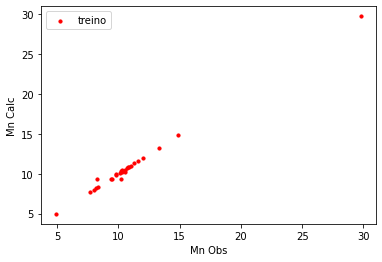

In [17]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
#plt.xlim([15,30])
#plt.ylim([15,30])
plt.ylabel('Mn Calc')
plt.xlabel('Mn Obs')
plt.show()

In [18]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.0844700401225731
R^2 treino= 0.9950751463578381


In [19]:
def function(x):
  global model
  x=x.reshape((1, 4))
  df = pd.DataFrame(x)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun

In [20]:
bounds = [(-2, 3),(-2, 3),(-2, 3),(-2, 3)]
bounds = [(-1, 1),(-1, 1),(-1, 1),(-1, 1)]
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 4))
print(Condicoes)

         0    1    2    3
0  0.54519  1.0  1.0  1.0


In [21]:
Condicoes = np.array(Condicoes)
# X_otimo=scaler_X.inverse_transform(Condicoes)
X_otimo = OriginalX(Condicoes,X)
X_otimo

array([[50.90379843,  5.        ,  1.        ,  0.2       ]])

In [22]:

Xopt = pd.DataFrame(Condicoes)
yopt=model.predict(Xopt)

In [23]:
yopt

array([1.88388255])